In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [19]:
df= pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [20]:
df.sample(5)

,Survived,Age,Fare
75,0,25.0,7.6500
796,1,49.0,25.9292
585,1,18.0,79.6500
227,0,20.5,7.2500
85,1,33.0,15.8500


In [21]:
df.dropna(inplace = True)

In [22]:
df.shape

(714, 3)

In [23]:
df.sample(5)

,Survived,Age,Fare
371,0,18.0,6.4958
526,1,50.0,10.5000
785,0,25.0,7.2500
824,0,2.0,39.6875
419,0,10.0,24.1500


In [24]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [27]:
# lets predict without any transformation 
clf =  DecisionTreeClassifier()

In [28]:
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [30]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv= 10,scoring = 'accuracy'))

0.6330985915492957

# Binning 

In [31]:
kbins_age = KBinsDiscretizer(n_bins = 15,encode = 'ordinal',strategy = 'quantile')
kbins_fare = KBinsDiscretizer(n_bins = 15,encode = 'ordinal',strategy = 'quantile')

In [32]:
trf = ColumnTransformer([
    ('first',kbins_age,[0]),
    ('second',kbins_fare,[1])
    
])

In [33]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [34]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [35]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [36]:
x_train['Age']

328    31.0
73     26.0
253    30.0
719    33.0
666    25.0
       ... 
92     46.0
134    25.0
337    41.0
548    33.0
130    33.0
Name: Age, Length: 571, dtype: float64

In [37]:
x_train_trf[0]

array([8., 8.])

In [38]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [39]:
output

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [44]:
output['age_labels'] = pd.cut(x = x_train['Age'],
                             bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = x_train['Fare'],
                             bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [45]:
output['age_labels']

328    (30.0, 32.0]
73     (25.0, 28.0]
253    (28.0, 30.0]
719    (32.0, 35.0]
666    (23.0, 25.0]
           ...     
92     (42.0, 47.0]
134    (23.0, 25.0]
337    (38.0, 42.0]
548    (32.0, 35.0]
130    (32.0, 35.0]
Name: age_labels, Length: 571, dtype: category
Categories (15, interval[float64, right]): [(0.42, 6.0] < (6.0, 16.0] < (16.0, 19.0] < (19.0, 21.0] ... (38.0, 42.0] < (42.0, 47.0] < (47.0, 54.0] < (54.0, 80.0]]

In [46]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
804,27.0,6.0,6.9750,0.0,"(25.0, 28.0]","(0.0, 7.25]"
60,22.0,4.0,7.2292,0.0,"(21.0, 23.0]","(0.0, 7.25]"
838,32.0,9.0,56.4958,12.0,"(30.0, 32.0]","(51.479, 76.292]"
565,24.0,5.0,24.1500,8.0,"(23.0, 25.0]","(18.75, 26.0]"


In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [49]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [50]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.630281690140845

In [65]:
def discretize(bins,strategy):
    kbins_age = KBinsDiscretizer(n_bins = bins,encode = 'ordinal',strategy = strategy)
    kbins_fare = KBinsDiscretizer(n_bins = bins,encode = 'ordinal',strategy = strategy)    
    trf = ColumnTransformer([
        ('first',kbins_age,[0]),
        ('second',kbins_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,5))
    
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color = 'red')
    plt.title('before')
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color = 'red')
    plt.title('before')
    
    plt.show()

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

0.6289319248826291


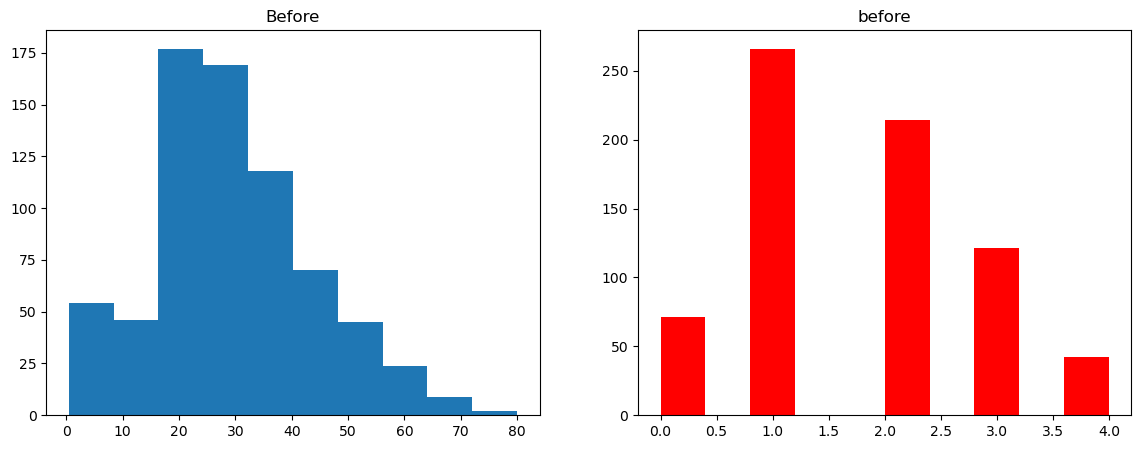

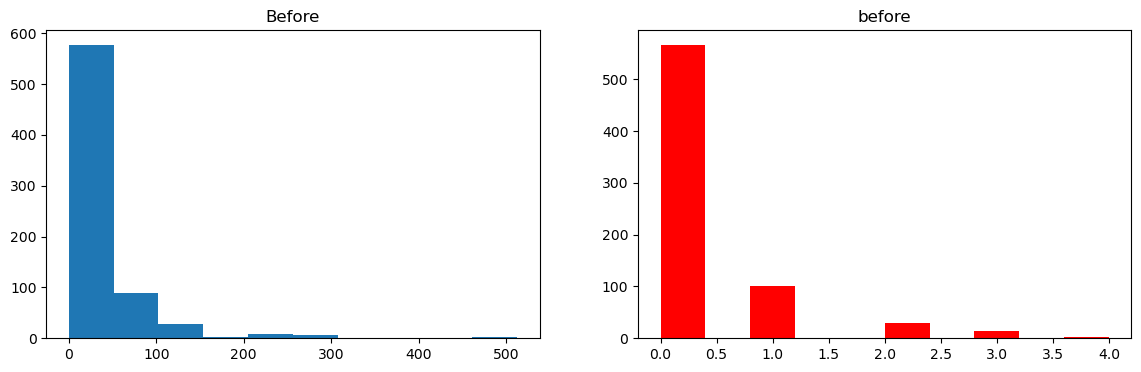

In [66]:
discretize(5,'kmeans')

In [67]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

0.6288928012519561


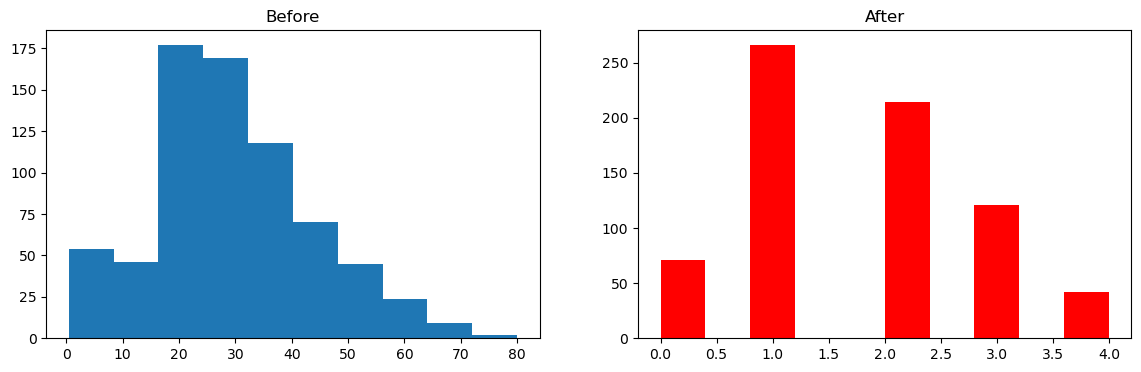

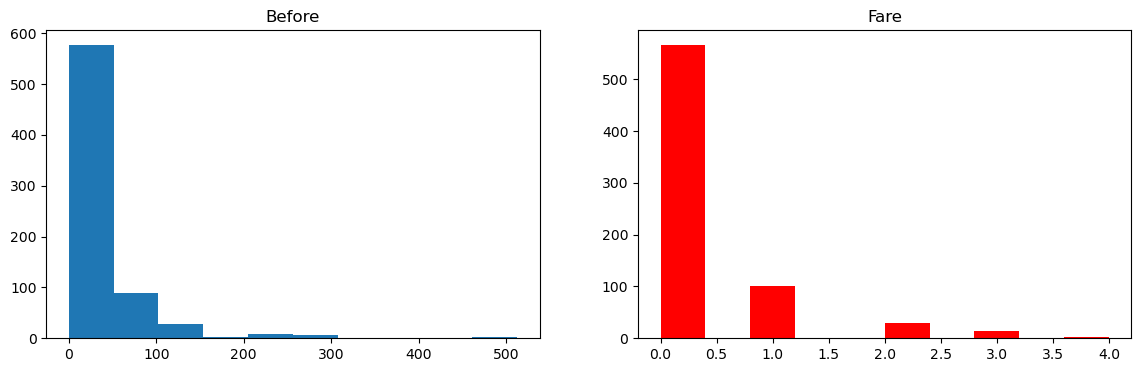

In [68]:
discretize(5,'kmeans')